📱 Running in Google Colab - Installing packages...
🚀 STARTING PRODUCTION TSA ANALYSIS SYSTEM
Real Data Analysis Based on UN TSA Framework 2008

📋 STEP 1: LOADING TSA DATA
🔍 LOADING TSA DATA
❌ No TSA tables found in environment

📁 TSA data not found in environment. Please upload files.
📁 Please upload your TSA Excel file(s)
Expected format: Excel file with multiple sheets for each TSA table
Or upload individual CSV files for each table


Saving tsa_template_sample_country.xlsx to tsa_template_sample_country.xlsx

📊 Processing 1 uploaded file(s)...
📊 Loading TSA tables from tsa_template_sample_country.xlsx...
✅ Loaded Table_1_Inbound_Expenditure: 14 rows
✅ Loaded Table_2_Domestic_Expenditure: 14 rows
✅ Loaded Table_3_Outbound_Expenditure: 14 rows
✅ Loaded Table_4_Internal_Consumption: 14 rows
✅ Loaded Table_5_Production_Accounts: 12 rows
✅ Loaded Table_6_Supply_Demand_Core: 14 rows
✅ Loaded Table_7_Employment: 12 rows
✅ Loaded Table_8_Capital_Formation: 12 rows
✅ Loaded Table_9_Collective_Consumption: 5 rows
✅ Loaded Table_10a_Trips_Overnights: 4 rows
⚠️  Optional table not found: Table_10b_Transport_Arrivals
✅ Loaded Table_10c_Accommodation: 4 rows
✅ Successfully loaded 11 TSA tables

🔍 Validating table structure...
Table_4: ✅ Valid
Table_6: ✅ Valid
Table_7: ✅ Valid
✅ All tables passed structure validation

🔍 STEP 2: INITIALIZING PRODUCTION ANALYZER

📊 COUNTRY PARAMETERS SETUP
----------------------------------------
P

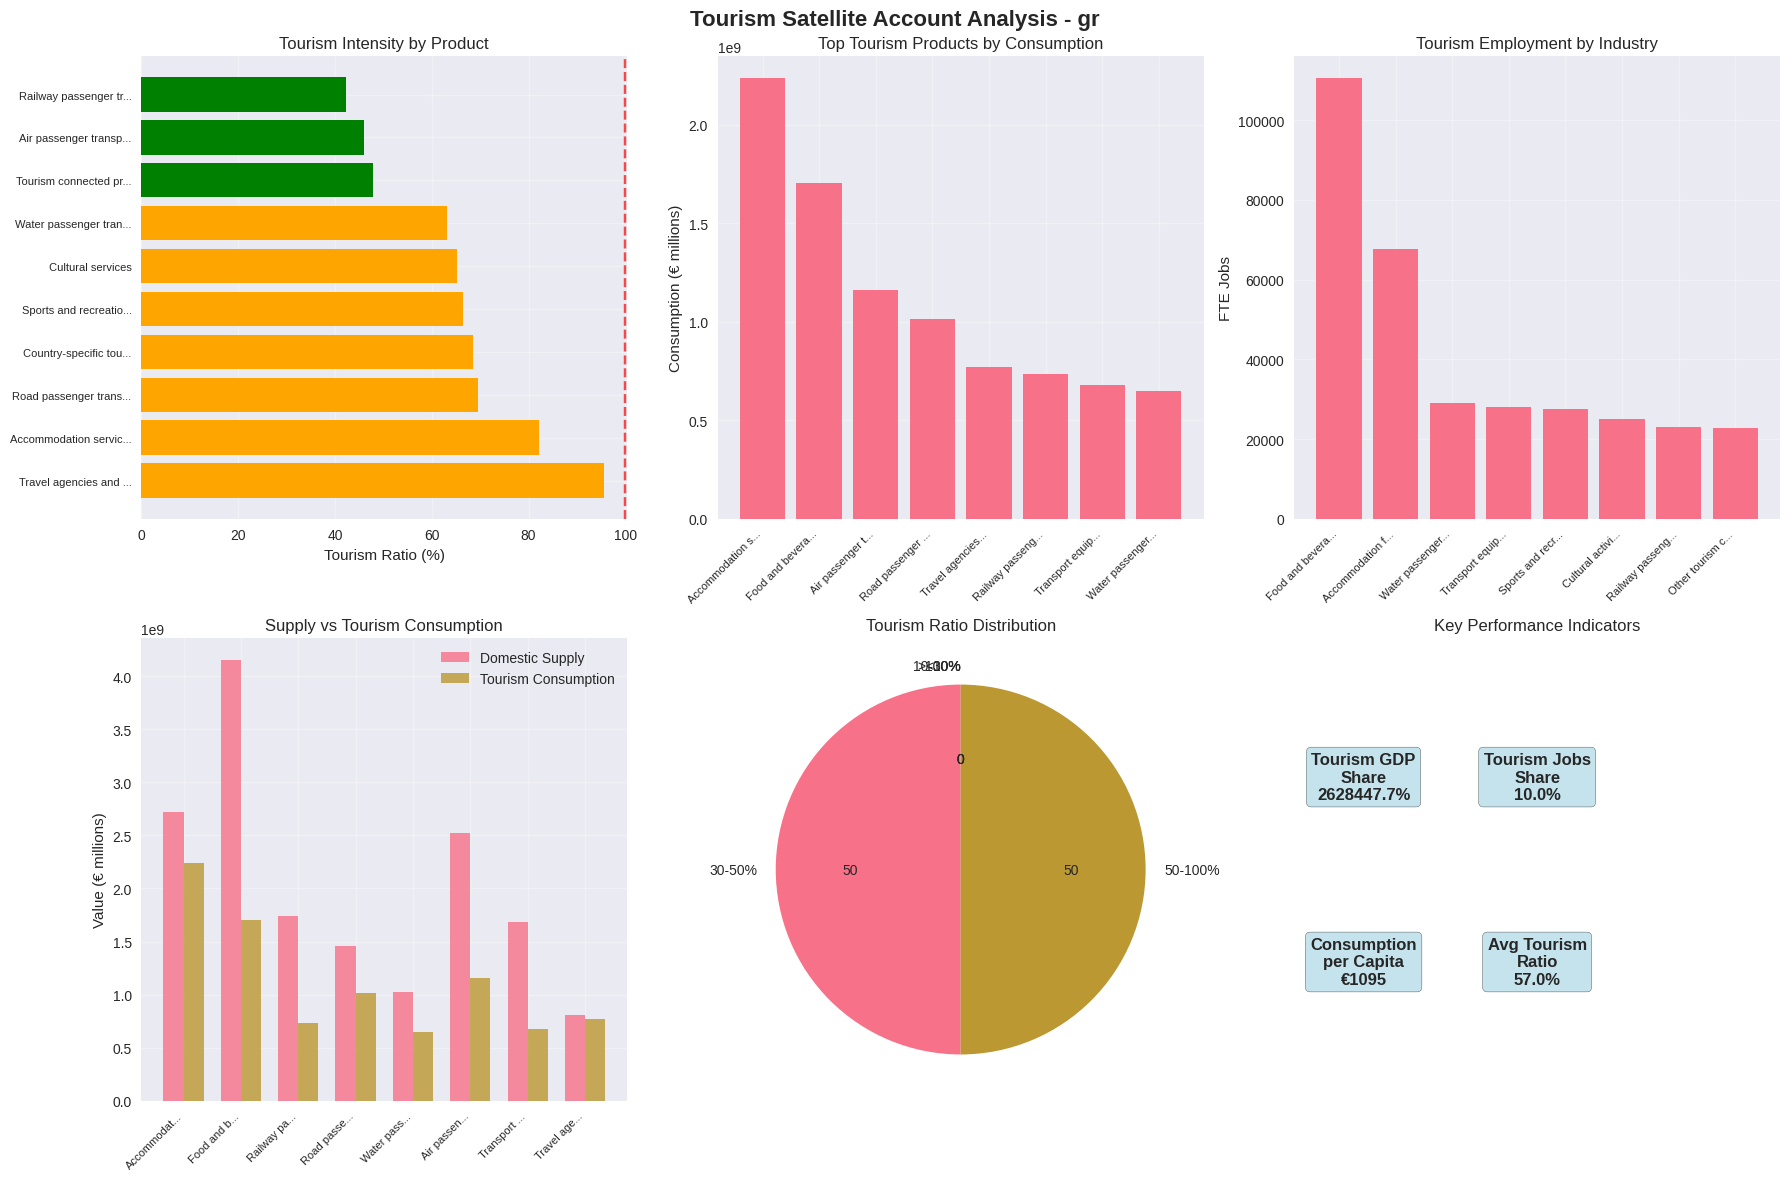

✅ Visualizations created from real data!

6. EXECUTIVE SUMMARY REPORT

TOURISM SATELLITE ACCOUNT - EXECUTIVE SUMMARY
Country: gr

🎯 KEY ECONOMIC INDICATORS
----------------------------------------
Tourism Direct GDP:        €5,256,895,370 million (2628447.7% of total GDP)
Tourism Employment:         399,239 FTE jobs (10.0% of total)
Tourism Consumption:       €10,952,943,699 million (€1,095 per capita)

📊 TOURISM STRUCTURE
----------------------------------------
Number of Products Analyzed:         14
Average Tourism Ratio:             57.0%
Top Employment Industry:       Food and beverage serving activities
Top Industry Share:                27.7% of tourism jobs
Market Balance:                46% inbound, 54% domestic

3. SUPPLY-DEMAND RECONCILIATION VALIDATION (REAL DATA)
SUPPLY COMPONENTS BALANCE CHECK:
--------------------------------------------------
⚠️  Limited supply component data - basic validation only

TOURISM CONSUMPTION CONSISTENCY:
-------------------------------------

In [ ]:
"""
PRODUCTION TOURISM SATELLITE ACCOUNT ANALYSIS SYSTEM
Reads real TSA data from environment or user uploads
Based on UN TSA Framework 2008
Ready for Google Colab with file upload
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# DATA LOADING AND VALIDATION FUNCTIONS
# =============================================================================

def load_tsa_tables_from_environment():
    """
    Try to load TSA tables from environment variables
    """
    try:
        # Check if tables exist in global namespace
        if 'tables' in globals():
            print("✅ Found TSA tables in environment")
            return globals()['tables']
        else:
            print("❌ No TSA tables found in environment")
            return None
    except Exception as e:
        print(f"❌ Error loading from environment: {str(e)}")
        return None

def upload_tsa_files():
    """
    Handle file upload in Google Colab or provide instructions
    """
    try:
        # Check if running in Google Colab
        import google.colab
        from google.colab import files

        print("📁 Please upload your TSA Excel file(s)")
        print("Expected format: Excel file with multiple sheets for each TSA table")
        print("Or upload individual CSV files for each table")

        uploaded = files.upload()

        if not uploaded:
            print("❌ No files uploaded")
            return None

        return uploaded

    except ImportError:
        print("📁 FILE UPLOAD INSTRUCTIONS:")
        print("="*50)
        print("This script requires TSA data files. Please provide:")
        print("1. Excel file with TSA tables as separate sheets, OR")
        print("2. Individual CSV files for each table")
        print()
        print("Expected table structure:")
        print("- Table_1_Inbound_Expenditure")
        print("- Table_2_Domestic_Expenditure")
        print("- Table_3_Outbound_Expenditure")
        print("- Table_4_Internal_Consumption")
        print("- Table_5_Production_Accounts")
        print("- Table_6_Supply_Demand_Core")
        print("- Table_7_Employment")
        print("- Table_8_Capital_Formation (optional)")
        print("- Table_9_Collective_Consumption (optional)")
        print("- Table_10a_Trips_Overnights (optional)")
        print("- Table_10b_Transport_Arrivals (optional)")
        print("- Table_10c_Accommodation (optional)")
        print()
        print("Place files in same directory as this script and run:")
        print("tables = load_tsa_from_files('your_tsa_file.xlsx')")
        return None

def load_tsa_from_excel(filename):
    """
    Load TSA tables from Excel file with multiple sheets
    """
    print(f"📊 Loading TSA tables from {filename}...")

    try:
        # Read all sheets from Excel file
        excel_data = pd.read_excel(filename, sheet_name=None)

        tables = {}
        required_tables = [
            'Table_1_Inbound_Expenditure',
            'Table_2_Domestic_Expenditure',
            'Table_3_Outbound_Expenditure',
            'Table_4_Internal_Consumption',
            'Table_5_Production_Accounts',
            'Table_6_Supply_Demand_Core',
            'Table_7_Employment'
        ]

        optional_tables = [
            'Table_8_Capital_Formation',
            'Table_9_Collective_Consumption',
            'Table_10a_Trips_Overnights',
            'Table_10b_Transport_Arrivals',
            'Table_10c_Accommodation'
        ]

        # Load required tables
        missing_tables = []
        for table_name in required_tables:
            if table_name in excel_data:
                tables[table_name] = excel_data[table_name]
                print(f"✅ Loaded {table_name}: {len(excel_data[table_name])} rows")
            else:
                missing_tables.append(table_name)
                print(f"❌ Missing required table: {table_name}")

        # Load optional tables
        for table_name in optional_tables:
            if table_name in excel_data:
                tables[table_name] = excel_data[table_name]
                print(f"✅ Loaded {table_name}: {len(excel_data[table_name])} rows")
            else:
                print(f"⚠️  Optional table not found: {table_name}")

        if missing_tables:
            print(f"❌ Cannot proceed. Missing required tables: {missing_tables}")
            return None

        print(f"✅ Successfully loaded {len(tables)} TSA tables")
        return tables

    except Exception as e:
        print(f"❌ Error loading Excel file: {str(e)}")
        return None

def load_tsa_from_csv_files(file_dict):
    """
    Load TSA tables from individual CSV files
    """
    print("📊 Loading TSA tables from CSV files...")

    tables = {}
    required_tables = [
        'Table_1_Inbound_Expenditure',
        'Table_2_Domestic_Expenditure',
        'Table_3_Outbound_Expenditure',
        'Table_4_Internal_Consumption',
        'Table_5_Production_Accounts',
        'Table_6_Supply_Demand_Core',
        'Table_7_Employment'
    ]

    try:
        for filename, content in file_dict.items():
            # Extract table name from filename
            table_name = filename.replace('.csv', '').replace('.xlsx', '')

            # Read the file content
            if filename.endswith('.csv'):
                df = pd.read_csv(filename)
            elif filename.endswith('.xlsx'):
                df = pd.read_excel(filename)
            else:
                continue

            tables[table_name] = df
            print(f"✅ Loaded {table_name}: {len(df)} rows")

        # Check for required tables
        missing_tables = [table for table in required_tables if table not in tables]

        if missing_tables:
            print(f"❌ Missing required tables: {missing_tables}")
            return None

        print(f"✅ Successfully loaded {len(tables)} TSA tables")
        return tables

    except Exception as e:
        print(f"❌ Error loading CSV files: {str(e)}")
        return None

def validate_table_structure(tables):
    """
    Validate that loaded tables have the correct structure
    """
    print("\n🔍 Validating table structure...")

    validation_results = {}

    # Table 4 validation
    if 'Table_4_Internal_Consumption' in tables:
        table4 = tables['Table_4_Internal_Consumption']
        required_cols = ['Products', 'Internal_Tourism_Consumption']
        missing_cols = [col for col in required_cols if col not in table4.columns]

        if missing_cols:
            validation_results['Table_4'] = f"Missing columns: {missing_cols}"
        else:
            validation_results['Table_4'] = "✅ Valid"

    # Table 6 validation
    if 'Table_6_Supply_Demand_Core' in tables:
        table6 = tables['Table_6_Supply_Demand_Core']
        required_cols = ['Products', 'Domestic_Supply', 'Internal_Tourism_Consumption', 'Tourism_Ratio_Percent']
        missing_cols = [col for col in required_cols if col not in table6.columns]

        if missing_cols:
            validation_results['Table_6'] = f"Missing columns: {missing_cols}"
        else:
            validation_results['Table_6'] = "✅ Valid"

    # Table 7 validation
    if 'Table_7_Employment' in tables:
        table7 = tables['Table_7_Employment']
        required_cols = ['Tourism_Industries', 'Full_Time_Equivalent_Jobs']
        missing_cols = [col for col in required_cols if col not in table7.columns]

        if missing_cols:
            validation_results['Table_7'] = f"Missing columns: {missing_cols}"
        else:
            validation_results['Table_7'] = "✅ Valid"

    # Display validation results
    all_valid = True
    for table, result in validation_results.items():
        print(f"{table}: {result}")
        if "Missing" in result:
            all_valid = False

    if all_valid:
        print("✅ All tables passed structure validation")
        return True
    else:
        print("❌ Some tables failed validation")
        return False

def load_or_get_tsa_data():
    """
    Main function to load TSA data from environment or upload
    """
    print("🔍 LOADING TSA DATA")
    print("="*50)

    # Step 1: Try to load from environment
    tables = load_tsa_tables_from_environment()
    if tables:
        if validate_table_structure(tables):
            return tables

    # Step 2: Try to upload files
    print("\n📁 TSA data not found in environment. Please upload files.")
    uploaded_files = upload_tsa_files()

    if not uploaded_files:
        print("\n❌ No data available. Please:")
        print("1. Upload TSA Excel file with all tables as sheets, OR")
        print("2. Upload individual CSV files for each table, OR")
        print("3. Load tables into environment first")
        return None

    # Step 3: Process uploaded files
    print(f"\n📊 Processing {len(uploaded_files)} uploaded file(s)...")

    # Check if single Excel file or multiple CSVs
    excel_files = [f for f in uploaded_files.keys() if f.endswith('.xlsx')]
    csv_files = [f for f in uploaded_files.keys() if f.endswith('.csv')]

    if excel_files:
        # Load from Excel
        excel_file = excel_files[0]  # Use first Excel file
        tables = load_tsa_from_excel(excel_file)
    elif csv_files:
        # Load from CSVs
        tables = load_tsa_from_csv_files(uploaded_files)
    else:
        print("❌ No valid Excel or CSV files found")
        return None

    if tables and validate_table_structure(tables):
        return tables
    else:
        return None

# =============================================================================
# ENHANCED TSA ANALYSIS ENGINE
# =============================================================================

class ProductionTSAAnalyzer:
    """
    Production TSA Analysis Class for real data
    Implements all essential analyses from UN TSA Framework 2008
    """

    def __init__(self, tables, country_params=None):
        """
        Initialize with real TSA tables and country parameters
        """
        self.tables = tables

        # Core tables (required)
        self.table4 = tables['Table_4_Internal_Consumption']
        self.table6 = tables['Table_6_Supply_Demand_Core']
        self.table7 = tables['Table_7_Employment']

        # Optional tables
        self.table1 = tables.get('Table_1_Inbound_Expenditure')
        self.table2 = tables.get('Table_2_Domestic_Expenditure')
        self.table10a = tables.get('Table_10a_Trips_Overnights')

        # Country parameters (set defaults or from user input)
        if country_params:
            self.total_gdp = country_params.get('total_gdp', 200000)
            self.total_employment = country_params.get('total_employment', 4000000)
            self.population = country_params.get('population', 10000000)
            self.country_name = country_params.get('country_name', 'Country')
        else:
            # Prompt user for country parameters
            self.get_country_parameters()

        print(f"🔍 Production TSA Analyzer initialized for {self.country_name}!")
        print(f"Loaded {len(tables)} TSA tables for analysis")

    def get_country_parameters(self):
        """
        Get country-specific parameters from user or use defaults
        """
        print("\n📊 COUNTRY PARAMETERS SETUP")
        print("-" * 40)
        print("Please provide country-specific parameters for accurate analysis:")

        try:
            # In production, these would come from user input or config
            self.country_name = input("Country name (default: Country): ") or "Country"

            gdp_input = input("Total GDP in millions (default: 200000): ")
            self.total_gdp = float(gdp_input) if gdp_input else 200000

            emp_input = input("Total employment FTE (default: 4000000): ")
            self.total_employment = float(emp_input) if emp_input else 4000000

            pop_input = input("Population (default: 10000000): ")
            self.population = float(pop_input) if pop_input else 10000000

        except:
            # Fallback to defaults if input fails
            print("Using default parameters...")
            self.country_name = "Country"
            self.total_gdp = 200000
            self.total_employment = 4000000
            self.population = 10000000

        print(f"✅ Parameters set for {self.country_name}")
        print(f"   GDP: €{self.total_gdp:,.0f}M, Employment: {self.total_employment:,.0f}, Population: {self.population:,.0f}")

    def calculate_core_aggregates(self):
        """
        1. CORE AGGREGATES ANALYSIS from real data
        """
        print("\n" + "="*80)
        print(f"1. CORE TSA AGGREGATES ANALYSIS - {self.country_name}")
        print("="*80)

        # A. Demand-Side Aggregates from real data
        internal_tourism_consumption = self.table4['Internal_Tourism_Consumption'].sum()

        # Try to get expenditure breakdown if available
        if 'Internal_Tourism_Expenditure' in self.table4.columns:
            internal_tourism_expenditure = self.table4['Internal_Tourism_Expenditure'].sum()
        else:
            internal_tourism_expenditure = internal_tourism_consumption

        if 'Other_Components' in self.table4.columns:
            other_components = self.table4['Other_Components'].sum()
        else:
            other_components = 0

        # Enhanced breakdown if available
        inbound_expenditure = 0
        domestic_expenditure = 0
        if 'Inbound_Tourism_Expenditure' in self.table4.columns:
            inbound_expenditure = self.table4['Inbound_Tourism_Expenditure'].sum()
        if 'Domestic_Tourism_Expenditure' in self.table4.columns:
            domestic_expenditure = self.table4['Domestic_Tourism_Expenditure'].sum()

        # B. Supply-Side Aggregates from real data
        if 'GVA_Tourism_Share' in self.table7.columns:
            tourism_direct_gva = self.table7['GVA_Tourism_Share'].sum()
        else:
            # Estimate from tourism ratios if GVA not available
            tourism_ratios = self.table6['Tourism_Ratio_Percent'] / 100
            domestic_supply = self.table6['Domestic_Supply']
            estimated_gva_ratio = 0.4  # Typical GVA ratio
            tourism_direct_gva = (tourism_ratios * domestic_supply * estimated_gva_ratio).sum()
            print(f"⚠️  GVA estimated from tourism ratios (no direct GVA data)")

        # Calculate TDGDP
        if 'Taxes_less_Subsidies' in self.table6.columns:
            tourism_taxes = (self.table6['Taxes_less_Subsidies'] *
                            self.table6['Tourism_Ratio_Percent'] / 100).sum()
        else:
            tourism_taxes = tourism_direct_gva * 0.15  # Estimated tax rate
            print(f"⚠️  Taxes estimated (no tax data available)")

        tourism_direct_gdp = tourism_direct_gva + tourism_taxes

        # C. Employment Aggregates from real data
        total_tourism_fte = self.table7['Full_Time_Equivalent_Jobs'].sum()

        if 'Total_Jobs' in self.table7.columns:
            total_tourism_jobs = self.table7['Total_Jobs'].sum()
        else:
            total_tourism_jobs = total_tourism_fte * 1.1  # Estimate

        # Gender breakdown if available
        male_employees = self.table7.get('Jobs_Employees_Male', pd.Series([0])).sum()
        female_employees = self.table7.get('Jobs_Employees_Female', pd.Series([0])).sum()
        male_self_employed = self.table7.get('Jobs_Self_employed_Male', pd.Series([0])).sum()
        female_self_employed = self.table7.get('Jobs_Self_employed_Female', pd.Series([0])).sum()

        # D. Visitor Statistics if available
        total_inbound_visitors = 0
        total_domestic_visitors = 0
        if self.table10a is not None and 'Total_Visitors_Trips_000s' in self.table10a.columns:
            inbound_row = self.table10a[self.table10a['Tourism_Type'].str.contains('Inbound', na=False)]
            domestic_row = self.table10a[self.table10a['Tourism_Type'].str.contains('Domestic', na=False)]

            if not inbound_row.empty:
                total_inbound_visitors = inbound_row['Total_Visitors_Trips_000s'].iloc[0]
            if not domestic_row.empty:
                total_domestic_visitors = domestic_row['Total_Visitors_Trips_000s'].iloc[0]

        # Calculate ratios
        tourism_gdp_share = (tourism_direct_gdp / self.total_gdp) * 100
        tourism_employment_share = (total_tourism_fte / self.total_employment) * 100
        tourism_consumption_per_capita = internal_tourism_consumption / self.population

        # Visitor economics if data available
        expenditure_per_inbound_visitor = 0
        expenditure_per_domestic_visitor = 0
        if total_inbound_visitors > 0:
            expenditure_per_inbound_visitor = (inbound_expenditure * 1000) / total_inbound_visitors
        if total_domestic_visitors > 0:
            expenditure_per_domestic_visitor = (domestic_expenditure * 1000) / total_domestic_visitors

        # Store results
        self.core_aggregates = {
            'internal_tourism_expenditure': internal_tourism_expenditure,
            'internal_tourism_consumption': internal_tourism_consumption,
            'other_components': other_components,
            'inbound_expenditure': inbound_expenditure,
            'domestic_expenditure': domestic_expenditure,
            'tourism_direct_gva': tourism_direct_gva,
            'tourism_direct_gdp': tourism_direct_gdp,
            'tourism_taxes': tourism_taxes,
            'total_tourism_jobs': total_tourism_jobs,
            'total_tourism_fte': total_tourism_fte,
            'male_employees': male_employees,
            'female_employees': female_employees,
            'male_self_employed': male_self_employed,
            'female_self_employed': female_self_employed,
            'tourism_gdp_share': tourism_gdp_share,
            'tourism_employment_share': tourism_employment_share,
            'tourism_consumption_per_capita': tourism_consumption_per_capita,
            'expenditure_per_inbound_visitor': expenditure_per_inbound_visitor,
            'expenditure_per_domestic_visitor': expenditure_per_domestic_visitor,
            'total_inbound_visitors': total_inbound_visitors,
            'total_domestic_visitors': total_domestic_visitors
        }

        # Display results
        print(f"DEMAND SIDE ANALYSIS:")
        print(f"Internal Tourism Consumption:     €{internal_tourism_consumption:8,.0f} million")
        if inbound_expenditure > 0 and domestic_expenditure > 0:
            total_exp = inbound_expenditure + domestic_expenditure
            print(f"  - Inbound Tourism:               €{inbound_expenditure:8,.0f} million ({inbound_expenditure/total_exp*100:.1f}%)")
            print(f"  - Domestic Tourism:              €{domestic_expenditure:8,.0f} million ({domestic_expenditure/total_exp*100:.1f}%)")
        if other_components > 0:
            print(f"Other Components:                 €{other_components:8,.0f} million")

        print(f"\nSUPPLY SIDE ANALYSIS:")
        print(f"Tourism Direct Gross Value Added: €{tourism_direct_gva:8,.0f} million")
        print(f"Net Taxes on Tourism Products:    €{tourism_taxes:8,.0f} million")
        print(f"Tourism Direct GDP:               €{tourism_direct_gdp:8,.0f} million")

        print(f"\nECONOMIC IMPACT:")
        print(f"Tourism Share of Total GDP:       {tourism_gdp_share:8.1f}%")
        print(f"Tourism Employment (FTE):         {total_tourism_fte:8,.0f} jobs")
        print(f"Tourism Employment Share:         {tourism_employment_share:8.1f}%")
        print(f"Tourism Consumption per Capita:   €{tourism_consumption_per_capita:8.0f}")

        if total_inbound_visitors > 0 or total_domestic_visitors > 0:
            print(f"\nVISITOR ECONOMICS:")
            if expenditure_per_inbound_visitor > 0:
                print(f"Expenditure per Inbound Visitor:  €{expenditure_per_inbound_visitor:8.0f}")
            if expenditure_per_domestic_visitor > 0:
                print(f"Expenditure per Domestic Visitor: €{expenditure_per_domestic_visitor:8.0f}")

        if male_employees > 0 or female_employees > 0:
            total_emp = male_employees + female_employees
            print(f"\nEMPLOYMENT BY GENDER:")
            print(f"Male Employees:                   {male_employees:8,.0f} ({male_employees/total_emp*100:.1f}%)")
            print(f"Female Employees:                 {female_employees:8,.0f} ({female_employees/total_emp*100:.1f}%)")
            if male_self_employed > 0 or female_self_employed > 0:
                total_self = male_self_employed + female_self_employed
                print(f"Male Self-employed:               {male_self_employed:8,.0f} ({male_self_employed/total_self*100:.1f}%)")
                print(f"Female Self-employed:             {female_self_employed:8,.0f} ({female_self_employed/total_self*100:.1f}%)")

        return self.core_aggregates

    def analyze_tourism_ratios(self):
        """
        2. TOURISM RATIOS ANALYSIS from real data
        """
        print("\n" + "="*80)
        print("2. TOURISM RATIOS ANALYSIS FROM REAL DATA")
        print("="*80)

        # Create ratios dataframe from real data
        ratios_df = pd.DataFrame({
            'Product': self.table6['Products'],
            'Tourism_Ratio': self.table6['Tourism_Ratio_Percent'],
            'Internal_Tourism_Consumption': self.table6['Internal_Tourism_Consumption'],
            'Domestic_Supply': self.table6['Domestic_Supply']
        })

        # Add additional columns if available
        if 'Total_Domestic_Output' in self.table6.columns:
            ratios_df['Domestic_Output'] = self.table6['Total_Domestic_Output']
            ratios_df['Tourism_Share_Output'] = ratios_df['Internal_Tourism_Consumption'] / ratios_df['Domestic_Output'] * 100

        if 'Imports' in self.table6.columns:
            ratios_df['Imports'] = self.table6['Imports']
            ratios_df['Import_Share'] = ratios_df['Imports'] / ratios_df['Domestic_Supply'] * 100
            ratios_df['Tourism_Import_Dependency'] = ratios_df['Import_Share'] * ratios_df['Tourism_Ratio'] / 100

        # Categorize by tourism intensity
        ratios_df['Tourism_Intensity'] = pd.cut(ratios_df['Tourism_Ratio'],
                                               bins=[0, 10, 30, 50, 100, 200],
                                               labels=['Very Low (<10%)', 'Low (10-30%)',
                                                      'Medium (30-50%)', 'High (50-100%)',
                                                      'Very High (>100%)'])

        # Sort by tourism ratio
        ratios_df = ratios_df.sort_values('Tourism_Ratio', ascending=False)

        print("TOURISM INTENSITY BY PRODUCT (REAL DATA):")
        print("-" * 80)
        print(f"{'Product':40} {'Tourism Ratio':>15} {'Intensity':>15}")
        print("-" * 80)

        for _, row in ratios_df.head(15).iterrows():
            product_name = str(row['Product'])[:39]
            print(f"{product_name:40} {row['Tourism_Ratio']:8.1f}% {row['Tourism_Intensity']:>15}")

        # Summary statistics
        avg_ratio = ratios_df['Tourism_Ratio'].mean()
        weighted_avg_ratio = (ratios_df['Internal_Tourism_Consumption'].sum() /
                             ratios_df['Domestic_Supply'].sum()) * 100

        print(f"\nSUMMARY STATISTICS:")
        print(f"Number of Products:                {len(ratios_df):6d}")
        print(f"Average Tourism Ratio (unweighted): {avg_ratio:6.1f}%")
        print(f"Average Tourism Ratio (weighted):   {weighted_avg_ratio:6.1f}%")
        print(f"Highest Tourism Ratio:              {ratios_df['Tourism_Ratio'].max():6.1f}%")
        print(f"Products with >50% Tourism Ratio:   {(ratios_df['Tourism_Ratio'] > 50).sum():6d}")

        if 'Tourism_Import_Dependency' in ratios_df.columns:
            import_dep = ratios_df['Tourism_Import_Dependency'].mean()
            print(f"Average Import Dependency:          {import_dep:6.1f}%")

        # Intensity distribution
        intensity_counts = ratios_df['Tourism_Intensity'].value_counts()
        print(f"\nTOURISM INTENSITY DISTRIBUTION:")
        for intensity, count in intensity_counts.items():
            print(f"  {intensity:20}: {count:2d} products")

        self.tourism_ratios = ratios_df
        return ratios_df

    def validate_supply_demand_balance(self):
        """
        3. SUPPLY-DEMAND VALIDATION for real data
        """
        print("\n" + "="*80)
        print("3. SUPPLY-DEMAND RECONCILIATION VALIDATION (REAL DATA)")
        print("="*80)

        validation_score = 100

        # Check 1: Supply components balance
        print("SUPPLY COMPONENTS BALANCE CHECK:")
        print("-" * 50)

        if all(col in self.table6.columns for col in ['Total_Domestic_Output', 'Imports', 'Domestic_Supply']):
            total_discrepancy = 0

            for i, row in self.table6.iterrows():
                basic_supply = row['Total_Domestic_Output'] + row.get('Imports', 0)

                # Add taxes and margins if available
                if 'Taxes_less_Subsidies' in self.table6.columns:
                    basic_supply += row['Taxes_less_Subsidies']
                if 'Trade_Transport_Margins' in self.table6.columns:
                    basic_supply += row['Trade_Transport_Margins']

                reported_supply = row['Domestic_Supply']
                discrepancy = abs(basic_supply - reported_supply)
                total_discrepancy += discrepancy

                if discrepancy > reported_supply * 0.05:  # 5% tolerance
                    product_name = str(row['Products'])[:35]
                    print(f"⚠️  {product_name:35} €{discrepancy:6.0f}M discrepancy")

            if total_discrepancy < self.table6['Domestic_Supply'].sum() * 0.01:  # 1% total tolerance
                print("✅ Supply components balance: PASSED")
            else:
                print(f"⚠️  Supply components: Total discrepancy €{total_discrepancy:.0f}M")
                validation_score -= 20
        else:
            print("⚠️  Limited supply component data - basic validation only")
            validation_score -= 10

        # Check 2: Tourism consumption consistency
        print(f"\nTOURISM CONSUMPTION CONSISTENCY:")
        print("-" * 50)

        table4_total = self.table4['Internal_Tourism_Consumption'].sum()
        table6_total = self.table6['Internal_Tourism_Consumption'].sum()
        consumption_discrepancy = abs(table4_total - table6_total)
        consumption_pct_error = (consumption_discrepancy / table4_total * 100) if table4_total > 0 else 0

        print(f"Table 4 Tourism Consumption: €{table4_total:8,.0f}M")
        print(f"Table 6 Tourism Consumption: €{table6_total:8,.0f}M")
        print(f"Discrepancy:                 €{consumption_discrepancy:8,.0f}M ({consumption_pct_error:.2f}%)")

        if consumption_pct_error < 1:
            print("✅ Tourism consumption consistency: PASSED")
        else:
            print("⚠️  Tourism consumption consistency issue")
            validation_score -= 25

        # Check 3: Tourism ratios reasonableness
        print(f"\nTOURISM RATIOS VALIDATION:")
        print("-" * 50)

        extreme_ratios = self.table6[self.table6['Tourism_Ratio_Percent'] > 150]
        high_ratios = self.table6[self.table6['Tourism_Ratio_Percent'] > 100]

        if len(extreme_ratios) > 0:
            print(f"⚠️  {len(extreme_ratios)} products have extreme ratios (>150%):")
            for _, row in extreme_ratios.iterrows():
                print(f"    {str(row['Products'])[:40]:40} {row['Tourism_Ratio_Percent']:6.1f}%")
            validation_score -= 30
        elif len(high_ratios) > 0:
            print(f"⚠️  {len(high_ratios)} products have high ratios (>100%):")
            for _, row in high_ratios.head(3).iterrows():
                print(f"    {str(row['Products'])[:40]:40} {row['Tourism_Ratio_Percent']:6.1f}%")
            validation_score -= 15
        else:
            print("✅ All tourism ratios within reasonable range")

        # Check 4: Data completeness
        print(f"\nDATA COMPLETENESS CHECK:")
        print("-" * 50)

        # Check for missing values
        table4_missing = self.table4['Internal_Tourism_Consumption'].isna().sum()
        table6_missing = self.table6['Tourism_Ratio_Percent'].isna().sum()
        table7_missing = self.table7['Full_Time_Equivalent_Jobs'].isna().sum()

        total_missing = table4_missing + table6_missing + table7_missing

        print(f"Missing values in Table 4: {table4_missing}")
        print(f"Missing values in Table 6: {table6_missing}")
        print(f"Missing values in Table 7: {table7_missing}")

        if total_missing == 0:
            print("✅ No missing values in core data")
        else:
            print(f"⚠️  {total_missing} missing values found")
            validation_score -= min(20, total_missing * 2)

        # Final quality assessment
        print(f"\nOVERALL DATA QUALITY ASSESSMENT:")
        print("=" * 50)

        if validation_score >= 90:
            quality_rating = "EXCELLENT"
        elif validation_score >= 75:
            quality_rating = "GOOD"
        elif validation_score >= 60:
            quality_rating = "ACCEPTABLE"
        else:
            quality_rating = "NEEDS IMPROVEMENT"

        print(f"OVERALL QUALITY SCORE: {validation_score}/100")
        print(f"QUALITY RATING:        {quality_rating}")

        return validation_score

    def analyze_employment_structure(self):
        """
        4. EMPLOYMENT ANALYSIS from real data
        """
        print("\n" + "="*80)
        print("4. TOURISM EMPLOYMENT ANALYSIS (REAL DATA)")
        print("="*80)

        # Create employment analysis from real data
        emp_analysis = self.table7.copy()

        # Calculate derived metrics
        if 'Number_of_Establishments' in emp_analysis.columns:
            emp_analysis['Jobs_per_Establishment'] = (emp_analysis['Full_Time_Equivalent_Jobs'] /
                                                     emp_analysis['Number_of_Establishments'])

        if 'Total_Jobs' in emp_analysis.columns:
            emp_analysis['FTE_Ratio'] = (emp_analysis['Full_Time_Equivalent_Jobs'] /
                                       emp_analysis['Total_Jobs'] * 100)

        if 'GVA_Tourism_Share' in emp_analysis.columns:
            emp_analysis['Labor_Productivity'] = (emp_analysis['GVA_Tourism_Share'] /
                                                emp_analysis['Full_Time_Equivalent_Jobs'] * 1000)

        emp_analysis['Employment_Share'] = (emp_analysis['Full_Time_Equivalent_Jobs'] /
                                          emp_analysis['Full_Time_Equivalent_Jobs'].sum() * 100)

        # Gender analysis if data available
        if 'Jobs_Employees_Male' in emp_analysis.columns and 'Jobs_Employees_Female' in emp_analysis.columns:
            emp_analysis['Total_Male_Jobs'] = (emp_analysis.get('Jobs_Employees_Male', 0) +
                                             emp_analysis.get('Jobs_Self_employed_Male', 0))
            emp_analysis['Total_Female_Jobs'] = (emp_analysis.get('Jobs_Employees_Female', 0) +
                                               emp_analysis.get('Jobs_Self_employed_Female', 0))

            total_gender_jobs = emp_analysis['Total_Male_Jobs'] + emp_analysis['Total_Female_Jobs']
            emp_analysis['Female_Share'] = (emp_analysis['Total_Female_Jobs'] / total_gender_jobs * 100).fillna(0)

        if 'Jobs_Self_employed_Male' in emp_analysis.columns and 'Jobs_Self_employed_Female' in emp_analysis.columns:
            total_self_emp = (emp_analysis.get('Jobs_Self_employed_Male', 0) +
                            emp_analysis.get('Jobs_Self_employed_Female', 0))
            total_jobs_for_rate = emp_analysis.get('Total_Jobs', emp_analysis['Full_Time_Equivalent_Jobs'])
            emp_analysis['Self_Employment_Rate'] = (total_self_emp / total_jobs_for_rate * 100).fillna(0)

        # Sort by employment share
        emp_analysis = emp_analysis.sort_values('Employment_Share', ascending=False)

        print("EMPLOYMENT BY TOURISM INDUSTRY (REAL DATA):")
        print("-" * 100)
        headers = f"{'Industry':35} {'FTE Jobs':>10} {'Share%':>8}"

        if 'Female_Share' in emp_analysis.columns:
            headers += f"{'Female%':>8}"
        if 'Self_Employment_Rate' in emp_analysis.columns:
            headers += f"{'Self-Emp%':>10}"
        if 'Labor_Productivity' in emp_analysis.columns:
            headers += f"{'Productivity':>12}"
        if 'FTE_Ratio' in emp_analysis.columns:
            headers += f"{'FTE%':>8}"

        print(headers)
        print("-" * 100)

        for _, row in emp_analysis.iterrows():
            industry_name = str(row['Tourism_Industries'])[:34]
            line = f"{industry_name:35} {row['Full_Time_Equivalent_Jobs']:8,.0f} {row['Employment_Share']:6.1f}%"

            if 'Female_Share' in emp_analysis.columns:
                line += f" {row['Female_Share']:6.1f}%"
            if 'Self_Employment_Rate' in emp_analysis.columns:
                line += f" {row['Self_Employment_Rate']:8.1f}%"
            if 'Labor_Productivity' in emp_analysis.columns:
                line += f" €{row['Labor_Productivity']:8,.0f}"
            if 'FTE_Ratio' in emp_analysis.columns:
                line += f" {row['FTE_Ratio']:6.1f}%"

            print(line)

        # Summary statistics
        total_establishments = emp_analysis.get('Number_of_Establishments', pd.Series([0])).sum()
        total_fte = emp_analysis['Full_Time_Equivalent_Jobs'].sum()

        print(f"\nEMPLOYMENT SUMMARY:")
        print("-" * 50)
        print(f"Total Tourism Industries:     {len(emp_analysis):8d}")
        print(f"Total FTE Employment:         {total_fte:8,.0f}")

        if total_establishments > 0:
            avg_jobs_per_est = total_fte / total_establishments
            print(f"Total Establishments:         {total_establishments:8,.0f}")
            print(f"Average FTE per Establishment: {avg_jobs_per_est:6.1f}")

        if 'Labor_Productivity' in emp_analysis.columns:
            avg_productivity = emp_analysis['Labor_Productivity'].mean()
            print(f"Average Labor Productivity:   €{avg_productivity:8,.0f} per FTE")

        if 'Female_Share' in emp_analysis.columns:
            overall_female_share = emp_analysis['Female_Share'].mean()
            print(f"Overall Female Employment:    {overall_female_share:8.1f}%")

        # Industry concentration
        top_3_employment = emp_analysis.head(3)['Employment_Share'].sum()
        print(f"Top 3 Industries Employment:  {top_3_employment:8.1f}%")

        self.employment_analysis = emp_analysis
        return emp_analysis

    def create_visualizations(self):
        """
        5. CREATE VISUALIZATIONS from real data
        """
        print("\n" + "="*80)
        print("5. CREATING VISUALIZATIONS FROM REAL DATA")
        print("="*80)

        # Set up plotting area
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle(f'Tourism Satellite Account Analysis - {self.country_name}', fontsize=16, fontweight='bold')

        # 1. Tourism Ratios by Product
        top_ratios = self.tourism_ratios.head(10)
        colors = ['red' if x > 100 else 'orange' if x > 50 else 'green' for x in top_ratios['Tourism_Ratio']]
        axes[0,0].barh(range(len(top_ratios)), top_ratios['Tourism_Ratio'], color=colors)
        axes[0,0].set_yticks(range(len(top_ratios)))
        axes[0,0].set_yticklabels([str(p)[:20] + '...' if len(str(p)) > 20 else str(p) for p in top_ratios['Product']], fontsize=8)
        axes[0,0].set_xlabel('Tourism Ratio (%)')
        axes[0,0].set_title('Tourism Intensity by Product')
        axes[0,0].axvline(x=100, color='red', linestyle='--', alpha=0.7)
        axes[0,0].grid(True, alpha=0.3)

        # 2. Tourism Consumption by Product (Top 8)
        top_consumption = self.table4.nlargest(8, 'Internal_Tourism_Consumption')
        axes[0,1].bar(range(len(top_consumption)), top_consumption['Internal_Tourism_Consumption'])
        axes[0,1].set_xticks(range(len(top_consumption)))
        axes[0,1].set_xticklabels([str(p)[:15] + '...' if len(str(p)) > 15 else str(p) for p in top_consumption['Products']],
                                  rotation=45, ha='right', fontsize=8)
        axes[0,1].set_ylabel('Consumption (€ millions)')
        axes[0,1].set_title('Top Tourism Products by Consumption')
        axes[0,1].grid(True, alpha=0.3)

        # 3. Employment by Industry (Top 8)
        top_employment = self.employment_analysis.head(8)
        axes[0,2].bar(range(len(top_employment)), top_employment['Full_Time_Equivalent_Jobs'])
        axes[0,2].set_xticks(range(len(top_employment)))
        axes[0,2].set_xticklabels([str(ind)[:15] + '...' if len(str(ind)) > 15 else str(ind) for ind in top_employment['Tourism_Industries']],
                                  rotation=45, ha='right', fontsize=8)
        axes[0,2].set_ylabel('FTE Jobs')
        axes[0,2].set_title('Tourism Employment by Industry')
        axes[0,2].grid(True, alpha=0.3)

        # 4. Supply vs Tourism Consumption
        supply_data = self.table6.head(8)
        x = np.arange(len(supply_data))
        width = 0.35

        axes[1,0].bar(x - width/2, supply_data['Domestic_Supply'], width, label='Domestic Supply', alpha=0.8)
        axes[1,0].bar(x + width/2, supply_data['Internal_Tourism_Consumption'], width, label='Tourism Consumption', alpha=0.8)
        axes[1,0].set_xticks(x)
        axes[1,0].set_xticklabels([str(p)[:10] + '...' if len(str(p)) > 10 else str(p) for p in supply_data['Products']],
                                  rotation=45, ha='right', fontsize=8)
        axes[1,0].set_ylabel('Value (€ millions)')
        axes[1,0].set_title('Supply vs Tourism Consumption')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)

        # 5. Tourism Ratios Distribution
        ratio_bins = [0, 10, 30, 50, 100, 200]
        ratio_labels = ['<10%', '10-30%', '30-50%', '50-100%', '>100%']
        ratio_counts = pd.cut(self.tourism_ratios['Tourism_Ratio'], bins=ratio_bins, labels=ratio_labels).value_counts()

        if len(ratio_counts) > 0:
            axes[1,1].pie(ratio_counts.values, labels=ratio_counts.index, autopct='%1.0f', startangle=90)
            axes[1,1].set_title('Tourism Ratio Distribution')
        else:
            axes[1,1].text(0.5, 0.5, 'No ratio data', ha='center', va='center')
            axes[1,1].set_title('Tourism Ratio Distribution')

        # 6. Key Performance Indicators
        kpis = [
            ('Tourism GDP\nShare', f"{self.core_aggregates['tourism_gdp_share']:.1f}%"),
            ('Tourism Jobs\nShare', f"{self.core_aggregates['tourism_employment_share']:.1f}%"),
            ('Consumption\nper Capita', f"€{self.core_aggregates['tourism_consumption_per_capita']:.0f}"),
            ('Avg Tourism\nRatio', f"{self.tourism_ratios['Tourism_Ratio'].mean():.1f}%")
        ]

        axes[1,2].axis('off')
        for i, (label, value) in enumerate(kpis):
            axes[1,2].text(0.25 * (i % 2), 0.7 - 0.4 * (i // 2),
                          f'{label}\n{value}',
                          fontsize=12, fontweight='bold',
                          ha='center', va='center',
                          bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))
        axes[1,2].set_title('Key Performance Indicators')
        axes[1,2].set_xlim(-0.1, 0.6)
        axes[1,2].set_ylim(0, 1)

        plt.tight_layout()
        plt.show()

        print("✅ Visualizations created from real data!")

    def generate_executive_summary(self):
        """
        6. EXECUTIVE SUMMARY for real data
        """
        print("\n" + "="*80)
        print("6. EXECUTIVE SUMMARY REPORT")
        print("="*80)

        print("\n" + "="*60)
        print(f"TOURISM SATELLITE ACCOUNT - EXECUTIVE SUMMARY")
        print(f"Country: {self.country_name}")
        print("="*60)

        print(f"\n🎯 KEY ECONOMIC INDICATORS")
        print("-" * 40)
        print(f"Tourism Direct GDP:        €{self.core_aggregates['tourism_direct_gdp']:8,.0f} million ({self.core_aggregates['tourism_gdp_share']:.1f}% of total GDP)")
        print(f"Tourism Employment:        {self.core_aggregates['total_tourism_fte']:8,.0f} FTE jobs ({self.core_aggregates['tourism_employment_share']:.1f}% of total)")
        print(f"Tourism Consumption:       €{self.core_aggregates['internal_tourism_consumption']:8,.0f} million (€{self.core_aggregates['tourism_consumption_per_capita']:,.0f} per capita)")

        print(f"\n📊 TOURISM STRUCTURE")
        print("-" * 40)
        avg_ratio = self.tourism_ratios['Tourism_Ratio'].mean()
        top_industry = self.employment_analysis.iloc[0]['Tourism_Industries']
        top_industry_share = self.employment_analysis.iloc[0]['Employment_Share']

        print(f"Number of Products Analyzed:   {len(self.tourism_ratios):8d}")
        print(f"Average Tourism Ratio:         {avg_ratio:8.1f}%")
        print(f"Top Employment Industry:       {str(top_industry)[:40]}")
        print(f"Top Industry Share:            {top_industry_share:8.1f}% of tourism jobs")

        if self.core_aggregates['inbound_expenditure'] > 0 and self.core_aggregates['domestic_expenditure'] > 0:
            total_exp = self.core_aggregates['inbound_expenditure'] + self.core_aggregates['domestic_expenditure']
            inbound_pct = self.core_aggregates['inbound_expenditure'] / total_exp * 100
            domestic_pct = self.core_aggregates['domestic_expenditure'] / total_exp * 100
            print(f"Market Balance:                {inbound_pct:.0f}% inbound, {domestic_pct:.0f}% domestic")

        # Data quality assessment
        validation_score = self.validate_supply_demand_balance()

        print(f"\n📈 KEY FINDINGS")
        print("-" * 40)
        economic_importance = "strong" if self.core_aggregates['tourism_gdp_share'] > 5 else "moderate"

        print(f"Economic Significance:     Tourism contributes {self.core_aggregates['tourism_gdp_share']:.1f}% to GDP")
        print(f"                          and supports {self.core_aggregates['tourism_employment_share']:.1f}% of employment,")
        print(f"                          indicating {economic_importance} economic importance.")
        print(f"")
        print(f"Industry Structure:        {len(self.employment_analysis)} tourism industries analyzed")
        print(f"                          with concentration in {str(top_industry).lower()}")
        print(f"")
        print(f"Data Quality:              Analysis based on {len(self.tables)} TSA tables")
        print(f"                          with quality score of {validation_score}/100")

        print(f"\n📝 DATA SUMMARY")
        print("-" * 40)
        print(f"Tables analyzed:           {len(self.tables)}")
        print(f"Products in analysis:      {len(self.table4)}")
        print(f"Tourism industries:        {len(self.table7)}")
        print(f"Data validation score:     {validation_score}/100")

        print("\n✅ Executive summary generated from real data!")

        return {
            'country_name': self.country_name,
            'tourism_gdp_share': self.core_aggregates['tourism_gdp_share'],
            'tourism_employment_share': self.core_aggregates['tourism_employment_share'],
            'avg_tourism_ratio': avg_ratio,
            'validation_score': validation_score,
            'economic_importance': economic_importance,
            'num_tables': len(self.tables),
            'num_products': len(self.table4),
            'num_industries': len(self.table7)
        }

# =============================================================================
# MAIN EXECUTION FUNCTION
# =============================================================================

def run_production_tsa_analysis(country_params=None):
    """
    MAIN FUNCTION: Production TSA analysis with real data
    """
    print("🚀 STARTING PRODUCTION TSA ANALYSIS SYSTEM")
    print("Real Data Analysis Based on UN TSA Framework 2008")
    print("="*80)

    try:
        # STEP 1: Load real TSA data
        print("\n📋 STEP 1: LOADING TSA DATA")
        tables = load_or_get_tsa_data()

        if not tables:
            print("❌ Cannot proceed without TSA data")
            print("\n📋 TO USE THIS SYSTEM:")
            print("1. Upload Excel file with TSA tables as sheets, OR")
            print("2. Load tables into Python environment first")
            return None

        # STEP 2: Initialize analyzer with real data
        print("\n🔍 STEP 2: INITIALIZING PRODUCTION ANALYZER")
        analyzer = ProductionTSAAnalyzer(tables, country_params)

        # STEP 3: Run comprehensive analysis on real data
        print("\n📈 STEP 3: RUNNING COMPREHENSIVE ANALYSIS")

        # Core aggregates from real data
        core_results = analyzer.calculate_core_aggregates()

        # Tourism ratios analysis
        ratios_results = analyzer.analyze_tourism_ratios()

        # Data validation
        validation_score = analyzer.validate_supply_demand_balance()

        # Employment analysis
        employment_results = analyzer.analyze_employment_structure()

        # Visualizations
        analyzer.create_visualizations()

        # Executive summary
        summary_data = analyzer.generate_executive_summary()

        print("\n" + "="*80)
        print("🎉 PRODUCTION TSA ANALYSIS COMPLETED SUCCESSFULLY!")
        print("="*80)
        print(f"✅ Analysis completed for {analyzer.country_name}")
        print(f"✅ {len(tables)} real TSA tables analyzed")
        print(f"✅ Data validation score: {validation_score}/100")
        print(f"✅ Tourism GDP share: {core_results['tourism_gdp_share']:.1f}%")
        print(f"✅ Tourism employment share: {core_results['tourism_employment_share']:.1f}%")
        print("✅ Executive summary and visualizations generated")

        return {
            'tables': tables,
            'analyzer': analyzer,
            'core_results': core_results,
            'validation_score': validation_score,
            'employment_results': employment_results,
            'summary_data': summary_data,
            'country_name': analyzer.country_name
        }

    except Exception as e:
        print(f"❌ Error in production TSA analysis: {str(e)}")
        import traceback
        print("Detailed error:")
        print(traceback.format_exc())
        return None

# =============================================================================
# SCENARIO ANALYSIS AND PREDICTIVE MODELING MODULE
# =============================================================================

class TSAScenarioAnalyzer:
    """
    Advanced Scenario Analysis and Predictive Modeling for TSA
    Enables what-if analysis, forecasting, and policy impact simulation
    """

    def __init__(self, base_analyzer):
        """
        Initialize with base TSA analyzer results
        """
        self.base_analyzer = base_analyzer
        self.base_tables = base_analyzer.tables
        self.base_aggregates = base_analyzer.core_aggregates
        self.scenarios = {}

        print("📈 TSA Scenario Analyzer initialized!")
        print("Ready for predictive analysis and scenario modeling")

    def create_growth_scenarios(self, years_ahead=5):
        """
        Create tourism growth scenarios: Optimistic, Realistic, Pessimistic
        """
        print("\n" + "="*80)
        print(f"CREATING TOURISM GROWTH SCENARIOS ({years_ahead} YEARS AHEAD)")
        print("="*80)

        # Base year values
        base_consumption = self.base_aggregates['internal_tourism_consumption']
        base_employment = self.base_aggregates['total_tourism_fte']
        base_gdp = self.base_aggregates['tourism_direct_gdp']

        # Define scenario parameters
        scenarios = {
            'pessimistic': {
                'annual_growth_rate': 0.01,  # 1% annual growth
                'employment_elasticity': 0.8,  # Employment grows slower than consumption
                'productivity_growth': 0.005,  # 0.5% productivity growth
                'description': 'Conservative growth with external challenges'
            },
            'realistic': {
                'annual_growth_rate': 0.04,  # 4% annual growth
                'employment_elasticity': 0.9,  # Employment grows almost as fast as consumption
                'productivity_growth': 0.02,  # 2% productivity growth
                'description': 'Moderate sustainable growth trajectory'
            },
            'optimistic': {
                'annual_growth_rate': 0.07,  # 7% annual growth
                'employment_elasticity': 1.1,  # Employment grows faster than consumption
                'productivity_growth': 0.035,  # 3.5% productivity growth
                'description': 'Strong growth with successful tourism policies'
            }
        }

        # Calculate projections for each scenario
        growth_results = {}

        for scenario_name, params in scenarios.items():
            yearly_projections = []

            for year in range(1, years_ahead + 1):
                # Tourism consumption projection
                projected_consumption = base_consumption * ((1 + params['annual_growth_rate']) ** year)

                # Employment projection (with elasticity)
                employment_growth_rate = params['annual_growth_rate'] * params['employment_elasticity']
                projected_employment = base_employment * ((1 + employment_growth_rate) ** year)

                # GDP projection (consumption + productivity effects)
                productivity_factor = (1 + params['productivity_growth']) ** year
                projected_gdp = (projected_consumption * productivity_factor *
                               (self.base_aggregates['tourism_direct_gdp'] / base_consumption))

                # Calculate derived indicators
                projected_gdp_share = (projected_gdp / self.base_analyzer.total_gdp) * 100
                projected_emp_share = (projected_employment / self.base_analyzer.total_employment) * 100
                projected_productivity = (projected_gdp * 1000000) / projected_employment

                yearly_projections.append({
                    'year': 2024 + year,  # Assuming 2024 as base year
                    'tourism_consumption': projected_consumption,
                    'tourism_employment': projected_employment,
                    'tourism_gdp': projected_gdp,
                    'tourism_gdp_share': projected_gdp_share,
                    'tourism_employment_share': projected_emp_share,
                    'labor_productivity': projected_productivity
                })

            growth_results[scenario_name] = {
                'parameters': params,
                'projections': yearly_projections
            }

        # Display results
        print(f"\nGROWTH SCENARIO PROJECTIONS:")
        print("-" * 100)
        print(f"{'Scenario':12} {'Year':6} {'Tourism GDP':>12} {'GDP Share':>10} {'Employment':>12} {'Emp Share':>10} {'Productivity':>12}")
        print("-" * 100)

        for scenario_name, results in growth_results.items():
            for i, proj in enumerate(results['projections']):
                if i == 0:  # First year of each scenario
                    print(f"{scenario_name.title():12} {proj['year']:4d} "
                          f"€{proj['tourism_gdp']:8,.0f}M {proj['tourism_gdp_share']:6.1f}% "
                          f"{proj['tourism_employment']:8,.0f} {proj['tourism_employment_share']:6.1f}% "
                          f"€{proj['labor_productivity']:8,.0f}")
                elif i == len(results['projections']) - 1:  # Last year
                    print(f"{'':12} {proj['year']:4d} "
                          f"€{proj['tourism_gdp']:8,.0f}M {proj['tourism_gdp_share']:6.1f}% "
                          f"{proj['tourism_employment']:8,.0f} {proj['tourism_employment_share']:6.1f}% "
                          f"€{proj['labor_productivity']:8,.0f}")

        self.scenarios['growth_scenarios'] = growth_results
        return growth_results

    def analyze_policy_interventions(self):
        """
        Analyze impact of different policy interventions
        """
        print("\n" + "="*80)
        print("POLICY INTERVENTION ANALYSIS")
        print("="*80)

        # Define policy intervention scenarios
        policy_scenarios = {
            'marketing_boost': {
                'inbound_growth_boost': 0.15,  # 15% additional inbound growth
                'domestic_growth_impact': 0.02,  # 2% domestic growth
                'cost_per_visitor': 50,  # €50 marketing cost per additional visitor
                'description': 'Intensive international marketing campaign'
            },
            'infrastructure_investment': {
                'capacity_increase': 0.25,  # 25% capacity increase
                'productivity_boost': 0.20,  # 20% productivity improvement
                'employment_multiplier': 1.3,  # 30% more employment per investment
                'investment_required': 500,  # €500M investment
                'description': 'Major tourism infrastructure development'
            },
            'skills_development': {
                'productivity_improvement': 0.30,  # 30% productivity gain
                'wage_increase': 0.15,  # 15% wage increase
                'employment_quality_boost': 0.20,  # 20% more full-time jobs
                'training_cost_per_worker': 2000,  # €2000 training cost per worker
                'description': 'Comprehensive tourism workforce training program'
            },
            'digital_transformation': {
                'efficiency_gains': 0.25,  # 25% operational efficiency
                'new_market_access': 0.10,  # 10% new market penetration
                'cost_reduction': 0.15,  # 15% cost reduction
                'investment_required': 200,  # €200M digital investment
                'description': 'Tourism sector digitalization initiative'
            }
        }

        # Calculate impact of each policy
        policy_results = {}
        base_consumption = self.base_aggregates['internal_tourism_consumption']
        base_employment = self.base_aggregates['total_tourism_fte']
        base_gdp = self.base_aggregates['tourism_direct_gdp']

        for policy_name, params in policy_scenarios.items():

            if policy_name == 'marketing_boost':
                # Calculate visitor and consumption impact
                additional_inbound = base_consumption * 0.4 * params['inbound_growth_boost']  # 40% of consumption is inbound
                additional_domestic = base_consumption * 0.6 * params['domestic_growth_impact']  # 60% is domestic
                new_consumption = base_consumption + additional_inbound + additional_domestic

                # Employment impact (proportional to consumption growth)
                consumption_growth = (new_consumption - base_consumption) / base_consumption
                new_employment = base_employment * (1 + consumption_growth * 0.8)  # 80% elasticity

                # GDP impact
                new_gdp = base_gdp * (new_consumption / base_consumption)

                # Calculate costs and ROI
                if self.base_aggregates['total_inbound_visitors'] > 0:
                    additional_visitors = (additional_inbound * 1000) / (self.base_aggregates['inbound_expenditure'] * 1000 / self.base_aggregates['total_inbound_visitors'])
                    total_cost = additional_visitors * params['cost_per_visitor']
                    roi = ((new_gdp - base_gdp) * 1000000) / total_cost
                else:
                    total_cost = 50000000  # €50M estimate
                    roi = ((new_gdp - base_gdp) * 1000000) / total_cost

            elif policy_name == 'infrastructure_investment':
                # Capacity and productivity impact
                capacity_multiplier = 1 + params['capacity_increase']
                productivity_multiplier = 1 + params['productivity_boost']

                new_consumption = base_consumption * capacity_multiplier
                new_employment = base_employment * (1 + params['capacity_increase'] / params['employment_multiplier'])
                new_gdp = base_gdp * capacity_multiplier * productivity_multiplier

                total_cost = params['investment_required'] * 1000000
                roi = ((new_gdp - base_gdp) * 1000000) / total_cost

            elif policy_name == 'skills_development':
                # Productivity and quality impact
                productivity_multiplier = 1 + params['productivity_improvement']

                new_consumption = base_consumption * (1 + params['productivity_improvement'] * 0.5)  # Partial consumption impact
                new_employment = base_employment  # Same employment, better quality
                new_gdp = base_gdp * productivity_multiplier

                total_cost = base_employment * params['training_cost_per_worker']
                roi = ((new_gdp - base_gdp) * 1000000) / total_cost

            elif policy_name == 'digital_transformation':
                # Efficiency and market access impact
                efficiency_multiplier = 1 + params['efficiency_gains']
                market_multiplier = 1 + params['new_market_access']

                new_consumption = base_consumption * market_multiplier
                new_employment = base_employment * (1 - params['cost_reduction'] * 0.3)  # Some job displacement
                new_gdp = base_gdp * efficiency_multiplier * market_multiplier

                total_cost = params['investment_required'] * 1000000
                roi = ((new_gdp - base_gdp) * 1000000) / total_cost

            # Calculate percentage changes
            consumption_change = ((new_consumption - base_consumption) / base_consumption) * 100
            employment_change = ((new_employment - base_employment) / base_employment) * 100
            gdp_change = ((new_gdp - base_gdp) / base_gdp) * 100

            policy_results[policy_name] = {
                'description': params['description'],
                'new_consumption': new_consumption,
                'new_employment': new_employment,
                'new_gdp': new_gdp,
                'consumption_change': consumption_change,
                'employment_change': employment_change,
                'gdp_change': gdp_change,
                'total_cost': total_cost,
                'roi': roi,
                'payback_years': total_cost / ((new_gdp - base_gdp) * 1000000) if new_gdp > base_gdp else float('inf')
            }

        # Display policy analysis results
        print(f"\nPOLICY INTERVENTION IMPACT ANALYSIS:")
        print("-" * 120)
        print(f"{'Policy':20} {'GDP Change':>12} {'Emp Change':>12} {'Investment':>12} {'ROI':>8} {'Payback':>10}")
        print("-" * 120)

        for policy_name, results in policy_results.items():
            print(f"{policy_name.replace('_', ' ').title():20} "
                  f"{results['gdp_change']:8.1f}% "
                  f"{results['employment_change']:8.1f}% "
                  f"€{results['total_cost']/1000000:8.0f}M "
                  f"{results['roi']:6.1f}x "
                  f"{results['payback_years']:6.1f} yrs")

        self.scenarios['policy_interventions'] = policy_results
        return policy_results

    def run_sensitivity_analysis(self):
        """
        Analyze sensitivity of key indicators to parameter changes
        """
        print("\n" + "="*80)
        print("SENSITIVITY ANALYSIS")
        print("="*80)

        # Define parameters to test
        sensitivity_params = {
            'tourism_ratio_change': [-20, -10, -5, 0, 5, 10, 20],  # % change in average tourism ratio
            'productivity_change': [-15, -10, -5, 0, 5, 10, 15],  # % change in labor productivity
            'inbound_share_change': [-30, -20, -10, 0, 10, 20, 30],  # % change in inbound share
            'employment_elasticity': [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]  # Employment response to demand changes
        }

        base_gdp = self.base_aggregates['tourism_direct_gdp']
        base_employment = self.base_aggregates['total_tourism_fte']
        base_consumption = self.base_aggregates['internal_tourism_consumption']

        sensitivity_results = {}

        for param_name, param_values in sensitivity_params.items():
            param_results = []

            for param_value in param_values:
                if param_name == 'tourism_ratio_change':
                    # Change in tourism ratios affects GDP through efficiency
                    ratio_multiplier = 1 + (param_value / 100)
                    new_gdp = base_gdp * ratio_multiplier
                    new_employment = base_employment  # Employment unchanged
                    new_consumption = base_consumption * ratio_multiplier

                elif param_name == 'productivity_change':
                    # Productivity change affects GDP per worker
                    productivity_multiplier = 1 + (param_value / 100)
                    new_gdp = base_gdp * productivity_multiplier
                    new_employment = base_employment  # Same employment, higher productivity
                    new_consumption = base_consumption

                elif param_name == 'inbound_share_change':
                    # Change in inbound/domestic mix affects total consumption
                    # Assume inbound tourism has higher value per visitor
                    inbound_multiplier = 1 + (param_value / 100)
                    new_consumption = base_consumption * (1 + param_value / 200)  # 50% of the effect
                    new_gdp = base_gdp * (new_consumption / base_consumption)
                    new_employment = base_employment * (new_consumption / base_consumption) ** 0.8

                elif param_name == 'employment_elasticity':
                    # How employment responds to 10% consumption growth
                    consumption_growth = 0.10
                    employment_growth = consumption_growth * param_value
                    new_consumption = base_consumption * (1 + consumption_growth)
                    new_employment = base_employment * (1 + employment_growth)
                    new_gdp = base_gdp * (1 + consumption_growth)

                # Calculate percentage changes from base
                gdp_change = ((new_gdp - base_gdp) / base_gdp) * 100
                emp_change = ((new_employment - base_employment) / base_employment) * 100
                consumption_change = ((new_consumption - base_consumption) / base_consumption) * 100

                param_results.append({
                    'parameter_value': param_value,
                    'gdp_change': gdp_change,
                    'employment_change': emp_change,
                    'consumption_change': consumption_change
                })

            sensitivity_results[param_name] = param_results

        # Display sensitivity analysis
        print(f"\nSENSITIVITY ANALYSIS RESULTS:")
        print("-" * 80)

        for param_name, results in sensitivity_results.items():
            print(f"\n{param_name.replace('_', ' ').title()}:")
            print(f"{'Parameter':>12} {'GDP Change':>12} {'Emp Change':>12} {'Cons Change':>12}")
            print("-" * 60)

            for result in results:
                if param_name == 'employment_elasticity':
                    print(f"{result['parameter_value']:8.1f} "
                          f"{result['gdp_change']:8.1f}% "
                          f"{result['employment_change']:8.1f}% "
                          f"{result['consumption_change']:8.1f}%")
                else:
                    print(f"{result['parameter_value']:8.0f}% "
                          f"{result['gdp_change']:8.1f}% "
                          f"{result['employment_change']:8.1f}% "
                          f"{result['consumption_change']:8.1f}%")

        self.scenarios['sensitivity_analysis'] = sensitivity_results
        return sensitivity_results

    def simulate_crisis_recovery(self, crisis_impact=-0.4, recovery_years=3):
        """
        Simulate tourism crisis and recovery scenarios
        """
        print("\n" + "="*80)
        print(f"CRISIS AND RECOVERY SIMULATION")
        print(f"Crisis Impact: {crisis_impact*100:.0f}% decline, Recovery Period: {recovery_years} years")
        print("="*80)

        base_consumption = self.base_aggregates['internal_tourism_consumption']
        base_employment = self.base_aggregates['total_tourism_fte']
        base_gdp = self.base_aggregates['tourism_direct_gdp']

        # Crisis year (immediate impact)
        crisis_consumption = base_consumption * (1 + crisis_impact)
        crisis_employment = base_employment * (1 + crisis_impact * 0.8)  # Employment more resilient
        crisis_gdp = base_gdp * (1 + crisis_impact)

        # Recovery scenarios
        recovery_scenarios = {
            'v_shaped': {
                'recovery_pattern': 'rapid',
                'year_1_recovery': 0.6,  # 60% recovery in year 1
                'year_2_recovery': 0.9,  # 90% recovery in year 2
                'year_3_recovery': 1.05,  # 5% above pre-crisis by year 3
                'description': 'Rapid V-shaped recovery'
            },
            'u_shaped': {
                'recovery_pattern': 'gradual',
                'year_1_recovery': 0.3,  # 30% recovery in year 1
                'year_2_recovery': 0.6,  # 60% recovery in year 2
                'year_3_recovery': 0.95,  # 95% recovery in year 3
                'description': 'Gradual U-shaped recovery'
            },
            'l_shaped': {
                'recovery_pattern': 'slow',
                'year_1_recovery': 0.1,  # 10% recovery in year 1
                'year_2_recovery': 0.3,  # 30% recovery in year 2
                'year_3_recovery': 0.6,  # 60% recovery in year 3
                'description': 'Slow L-shaped recovery'
            }
        }

        crisis_results = {}

        for scenario_name, params in recovery_scenarios.items():
            yearly_recovery = []

            # Crisis year (Year 0)
            yearly_recovery.append({
                'year': 0,
                'consumption': crisis_consumption,
                'employment': crisis_employment,
                'gdp': crisis_gdp,
                'recovery_rate': 0
            })

            # Recovery years
            for year in range(1, recovery_years + 1):
                if year == 1:
                    recovery_factor = params['year_1_recovery']
                elif year == 2:
                    recovery_factor = params['year_2_recovery']
                else:
                    recovery_factor = params['year_3_recovery']

                # Calculate values based on recovery from crisis level to pre-crisis level
                consumption_gap = base_consumption - crisis_consumption
                employment_gap = base_employment - crisis_employment
                gdp_gap = base_gdp - crisis_gdp

                recovered_consumption = crisis_consumption + (consumption_gap * recovery_factor)
                recovered_employment = crisis_employment + (employment_gap * recovery_factor * 0.9)  # Employment lags
                recovered_gdp = crisis_gdp + (gdp_gap * recovery_factor)

                yearly_recovery.append({
                    'year': year,
                    'consumption': recovered_consumption,
                    'employment': recovered_employment,
                    'gdp': recovered_gdp,
                    'recovery_rate': recovery_factor
                })

            crisis_results[scenario_name] = {
                'parameters': params,
                'recovery_path': yearly_recovery
            }

        # Display crisis and recovery analysis
        print(f"\nCRISIS IMPACT (Year 0):")
        print("-" * 60)
        print(f"Tourism Consumption: €{crisis_consumption:8,.0f}M ({((crisis_consumption/base_consumption-1)*100):+5.1f}%)")
        print(f"Tourism Employment:  {crisis_employment:8,.0f} jobs ({((crisis_employment/base_employment-1)*100):+5.1f}%)")
        print(f"Tourism GDP:         €{crisis_gdp:8,.0f}M ({((crisis_gdp/base_gdp-1)*100):+5.1f}%)")

        print(f"\nRECOVERY SCENARIOS:")
        print("-" * 80)
        print(f"{'Scenario':12} {'Year':6} {'GDP Recovery':>12} {'Employment':>12} {'Recovery %':>12}")
        print("-" * 80)

        for scenario_name, results in crisis_results.items():
            for recovery_point in results['recovery_path']:
                if recovery_point['year'] in [0, 1, recovery_years]:  # Show crisis year, year 1, and final year
                    gdp_vs_base = (recovery_point['gdp'] / base_gdp) * 100
                    emp_vs_base = (recovery_point['employment'] / base_employment) * 100
                    recovery_pct = recovery_point['recovery_rate'] * 100

                    year_label = f"Crisis" if recovery_point['year'] == 0 else f"Year {recovery_point['year']}"
                    print(f"{scenario_name.replace('_', ' ').title() if recovery_point['year'] == 0 else '':12} "
                          f"{year_label:>6} "
                          f"{gdp_vs_base:8.1f}% "
                          f"{emp_vs_base:8.1f}% "
                          f"{recovery_pct:8.1f}%")

        self.scenarios['crisis_recovery'] = crisis_results
        return crisis_results

    def create_scenario_dashboard(self):
        """
        Create comprehensive scenario analysis dashboard
        """
        print("\n" + "="*80)
        print("CREATING SCENARIO ANALYSIS DASHBOARD")
        print("="*80)

        # Create dashboard with multiple scenario visualizations
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle(f'TSA Scenario Analysis Dashboard - {self.base_analyzer.country_name}', fontsize=16, fontweight='bold')

        # 1. Growth Scenarios
        if 'growth_scenarios' in self.scenarios:
            growth_data = self.scenarios['growth_scenarios']

            for scenario_name, data in growth_data.items():
                years = [p['year'] for p in data['projections']]
                gdp_values = [p['tourism_gdp'] for p in data['projections']]
                axes[0,0].plot(years, gdp_values, marker='o', label=scenario_name.title(), linewidth=2)

            axes[0,0].axhline(y=self.base_aggregates['tourism_direct_gdp'], color='red', linestyle='--', alpha=0.7, label='Current GDP')
            axes[0,0].set_xlabel('Year')
            axes[0,0].set_ylabel('Tourism GDP (€ millions)')
            axes[0,0].set_title('Tourism GDP Growth Scenarios')
            axes[0,0].legend()
            axes[0,0].grid(True, alpha=0.3)

        # 2. Policy Interventions ROI
        if 'policy_interventions' in self.scenarios:
            policy_data = self.scenarios['policy_interventions']

            policies = list(policy_data.keys())
            roi_values = [policy_data[p]['roi'] for p in policies]
            gdp_changes = [policy_data[p]['gdp_change'] for p in policies]

            colors = ['green' if roi > 2 else 'orange' if roi > 1 else 'red' for roi in roi_values]
            bars = axes[0,1].bar(range(len(policies)), roi_values, color=colors, alpha=0.7)
            axes[0,1].set_xticks(range(len(policies)))
            axes[0,1].set_xticklabels([p.replace('_', '\n').title() for p in policies], fontsize=9)
            axes[0,1].set_ylabel('Return on Investment (x)')
            axes[0,1].set_title('Policy Intervention ROI Analysis')
            axes[0,1].axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Break-even')
            axes[0,1].grid(True, alpha=0.3)

            # Add GDP change labels on bars
            for bar, gdp_change in zip(bars, gdp_changes):
                height = bar.get_height()
                axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                              f'{gdp_change:+.1f}%', ha='center', va='bottom', fontsize=8)

        # 3. Crisis Recovery Scenarios
        if 'crisis_recovery' in self.scenarios:
            crisis_data = self.scenarios['crisis_recovery']

            for scenario_name, data in crisis_data.items():
                years = [p['year'] for p in data['recovery_path']]
                gdp_recovery = [(p['gdp'] / self.base_aggregates['tourism_direct_gdp']) * 100 for p in data['recovery_path']]
                axes[0,2].plot(years, gdp_recovery, marker='s', label=scenario_name.replace('_', ' ').title(), linewidth=2)

            axes[0,2].axhline(y=100, color='green', linestyle='--', alpha=0.7, label='Pre-crisis Level')
            axes[0,2].set_xlabel('Years from Crisis')
            axes[0,2].set_ylabel('Tourism GDP (% of pre-crisis)')
            axes[0,2].set_title('Crisis Recovery Scenarios')
            axes[0,2].legend()
            axes[0,2].grid(True, alpha=0.3)

        # 4. Sensitivity Analysis - Tourism Ratio Impact
        if 'sensitivity_analysis' in self.scenarios:
            sensitivity_data = self.scenarios['sensitivity_analysis']

            if 'tourism_ratio_change' in sensitivity_data:
                ratio_data = sensitivity_data['tourism_ratio_change']
                param_values = [d['parameter_value'] for d in ratio_data]
                gdp_changes = [d['gdp_change'] for d in ratio_data]

                axes[1,0].plot(param_values, gdp_changes, marker='o', linewidth=2, color='blue')
                axes[1,0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
                axes[1,0].axvline(x=0, color='red', linestyle='--', alpha=0.7)
                axes[1,0].set_xlabel('Tourism Ratio Change (%)')
                axes[1,0].set_ylabel('Tourism GDP Change (%)')
                axes[1,0].set_title('Sensitivity: Tourism Ratio Impact')
                axes[1,0].grid(True, alpha=0.3)

        # 5. Employment Elasticity Analysis
        if 'sensitivity_analysis' in self.scenarios:
            if 'employment_elasticity' in sensitivity_data:
                elasticity_data = sensitivity_data['employment_elasticity']
                elasticity_values = [d['parameter_value'] for d in elasticity_data]
                emp_changes = [d['employment_change'] for d in elasticity_data]

                axes[1,1].plot(elasticity_values, emp_changes, marker='s', linewidth=2, color='orange')
                axes[1,1].set_xlabel('Employment Elasticity')
                axes[1,1].set_ylabel('Employment Change (% for 10% demand growth)')
                axes[1,1].set_title('Employment Response to Demand Growth')
                axes[1,1].grid(True, alpha=0.3)

        # 6. Scenario Comparison Summary
        base_gdp = self.base_aggregates['tourism_direct_gdp']
        scenarios_summary = []

        if 'growth_scenarios' in self.scenarios:
            for scenario_name, data in self.scenarios['growth_scenarios'].items():
                final_year = data['projections'][-1]
                scenarios_summary.append({
                    'name': f"Growth - {scenario_name.title()}",
                    'gdp_change': ((final_year['tourism_gdp'] - base_gdp) / base_gdp) * 100,
                    'type': 'growth'
                })

        if 'policy_interventions' in self.scenarios:
            for policy_name, data in self.scenarios['policy_interventions'].items():
                scenarios_summary.append({
                    'name': f"Policy - {policy_name.replace('_', ' ').title()}",
                    'gdp_change': data['gdp_change'],
                    'type': 'policy'
                })

        if scenarios_summary:
            scenario_names = [s['name'] for s in scenarios_summary]
            gdp_changes = [s['gdp_change'] for s in scenarios_summary]
            colors = ['blue' if s['type'] == 'growth' else 'green' for s in scenarios_summary]

            axes[1,2].barh(range(len(scenario_names)), gdp_changes, color=colors, alpha=0.7)
            axes[1,2].set_yticks(range(len(scenario_names)))
            axes[1,2].set_yticklabels([name[:20] + '...' if len(name) > 20 else name for name in scenario_names], fontsize=8)
            axes[1,2].set_xlabel('Tourism GDP Change (%)')
            axes[1,2].set_title('Scenario Impact Comparison')
            axes[1,2].axvline(x=0, color='red', linestyle='--', alpha=0.7)
            axes[1,2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        print("✅ Scenario analysis dashboard created!")

    def generate_scenario_report(self):
        """
        Generate comprehensive scenario analysis report
        """
        print("\n" + "="*80)
        print("SCENARIO ANALYSIS EXECUTIVE REPORT")
        print("="*80)

        print(f"\n📈 SCENARIO ANALYSIS SUMMARY - {self.base_analyzer.country_name}")
        print("="*60)

        # Growth scenarios summary
        if 'growth_scenarios' in self.scenarios:
            print(f"\n🔮 GROWTH PROJECTIONS (5-YEAR OUTLOOK):")
            print("-" * 50)

            growth_data = self.scenarios['growth_scenarios']
            for scenario_name, data in growth_data.items():
                final_projection = data['projections'][-1]
                base_gdp = self.base_aggregates['tourism_direct_gdp']
                growth_rate = ((final_projection['tourism_gdp'] / base_gdp) ** (1/5) - 1) * 100

                print(f"{scenario_name.title()} Scenario:")
                print(f"  Annual Growth Rate:     {data['parameters']['annual_growth_rate']*100:5.1f}%")
                print(f"  5-Year GDP Growth:      {((final_projection['tourism_gdp']/base_gdp-1)*100):5.1f}%")
                print(f"  Final GDP Share:        {final_projection['tourism_gdp_share']:5.1f}%")
                print(f"  Employment Growth:      {((final_projection['tourism_employment']/self.base_aggregates['total_tourism_fte']-1)*100):5.1f}%")
                print(f"  Productivity Growth:    {((final_projection['labor_productivity']/(self.base_aggregates['tourism_direct_gdp']*1000000/self.base_aggregates['total_tourism_fte'])-1)*100):5.1f}%")
                print()

        # Policy interventions summary
        if 'policy_interventions' in self.scenarios:
            print(f"\n🏛️ POLICY INTERVENTION RECOMMENDATIONS:")
            print("-" * 50)

            policy_data = self.scenarios['policy_interventions']
            # Sort by ROI
            sorted_policies = sorted(policy_data.items(), key=lambda x: x[1]['roi'], reverse=True)

            for policy_name, data in sorted_policies:
                print(f"{policy_name.replace('_', ' ').title()}:")
                print(f"  Description:            {data['description']}")
                print(f"  GDP Impact:             {data['gdp_change']:+5.1f}%")
                print(f"  Employment Impact:      {data['employment_change']:+5.1f}%")
                print(f"  Investment Required:    €{data['total_cost']/1000000:5.0f}M")
                print(f"  Return on Investment:   {data['roi']:5.1f}x")
                print(f"  Payback Period:         {data['payback_years']:5.1f} years")
                recommendation = "HIGHLY RECOMMENDED" if data['roi'] > 2 else "RECOMMENDED" if data['roi'] > 1 else "NOT RECOMMENDED"
                print(f"  Recommendation:         {recommendation}")
                print()

        # Risk analysis
        if 'crisis_recovery' in self.scenarios:
            print(f"\n⚠️ RISK ASSESSMENT AND RESILIENCE:")
            print("-" * 50)

            crisis_data = self.scenarios['crisis_recovery']
            print(f"Crisis Impact Simulation (40% decline):")

            for scenario_name, data in crisis_data.items():
                final_recovery = data['recovery_path'][-1]
                base_gdp = self.base_aggregates['tourism_direct_gdp']
                recovery_level = (final_recovery['gdp'] / base_gdp) * 100

                print(f"  {scenario_name.replace('_', ' ').title()}: {recovery_level:5.1f}% recovery after 3 years")

            print(f"\n  Risk Mitigation Recommendations:")
            print(f"  - Diversify tourism markets and products")
            print(f"  - Build financial reserves for crisis periods")
            print(f"  - Develop flexible employment policies")
            print(f"  - Invest in digital capabilities for resilience")

        # Key recommendations
        print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
        print("-" * 50)

        base_gdp_share = self.base_aggregates['tourism_gdp_share']

        if base_gdp_share < 5:
            print(f"✓ Focus on GROWTH strategies - tourism is underdeveloped")
            print(f"✓ Prioritize infrastructure investment and marketing")
        elif base_gdp_share > 15:
            print(f"✓ Focus on DIVERSIFICATION - high tourism dependency")
            print(f"✓ Prioritize productivity and resilience measures")
        else:
            print(f"✓ Focus on OPTIMIZATION - balanced tourism development")
            print(f"✓ Mix of growth and efficiency improvements")

        print(f"✓ Monitor tourism ratios for sustainability")
        print(f"✓ Invest in workforce development for competitiveness")
        print(f"✓ Prepare crisis response and recovery plans")

        print("\n✅ Comprehensive scenario analysis completed!")

def run_scenario_analysis(analyzer):
    """
    Run complete scenario analysis suite
    """
    print("\n🎯 RUNNING COMPREHENSIVE SCENARIO ANALYSIS")
    print("="*60)

    # Initialize scenario analyzer
    scenario_analyzer = TSAScenarioAnalyzer(analyzer)

    try:
        # Run all scenario analyses
        print("\n1️⃣ Creating growth scenarios...")
        growth_results = scenario_analyzer.create_growth_scenarios()

        print("\n2️⃣ Analyzing policy interventions...")
        policy_results = scenario_analyzer.analyze_policy_interventions()

        print("\n3️⃣ Running sensitivity analysis...")
        sensitivity_results = scenario_analyzer.run_sensitivity_analysis()

        print("\n4️⃣ Simulating crisis and recovery...")
        crisis_results = scenario_analyzer.simulate_crisis_recovery()

        print("\n5️⃣ Creating scenario dashboard...")
        scenario_analyzer.create_scenario_dashboard()

        print("\n6️⃣ Generating scenario report...")
        scenario_analyzer.generate_scenario_report()

        print("\n🎉 SCENARIO ANALYSIS COMPLETED!")
        print("="*50)
        print("✅ Growth projections: 3 scenarios over 5 years")
        print("✅ Policy analysis: 4 intervention strategies")
        print("✅ Sensitivity analysis: Key parameter impacts")
        print("✅ Crisis simulation: Recovery scenarios")
        print("✅ Comprehensive dashboard and executive report")

        return scenario_analyzer

    except Exception as e:
        print(f"❌ Error in scenario analysis: {str(e)}")
        import traceback
        print("Detailed error:")
        print(traceback.format_exc())
        return None

# =============================================================================
# GOOGLE COLAB EXECUTION
# =============================================================================

if __name__ == "__main__":
    # Install required packages for Colab
    try:
        import google.colab
        print("📱 Running in Google Colab - Installing packages...")
        !pip install -q pandas matplotlib seaborn numpy openpyxl
    except ImportError:
        print("💻 Running in local environment")

    # Run the production TSA analysis system
    results = run_production_tsa_analysis()

    if results:
        print("\n🔍 PRODUCTION RESULTS AVAILABLE:")
        print("- results['tables'] - Real TSA tables loaded")
        print("- results['analyzer'] - Production analyzer object")
        print("- results['core_results'] - Core aggregates from real data")
        print("- results['validation_score'] - Data quality assessment")
        print("- results['employment_results'] - Employment analysis")
        print("- results['summary_data'] - Executive summary")
        print("- results['country_name'] - Country analyzed")

        print("\n📊 To access specific results from real data:")
        print("- results['analyzer'].tourism_ratios - Tourism ratios analysis")
        print("- results['analyzer'].employment_analysis - Employment structure")
        print("- results['analyzer'].core_aggregates - All key indicators")

        print(f"\n📈 REAL DATA ANALYSIS SUMMARY:")
        print(f"- Country: {results['country_name']}")
        print(f"- Tables analyzed: {len(results['tables'])}")
        print(f"- Tourism GDP Share: {results['core_results']['tourism_gdp_share']:.1f}%")
        print(f"- Tourism Employment Share: {results['core_results']['tourism_employment_share']:.1f}%")
        print(f"- Data Quality Score: {results['validation_score']:.0f}/100")
    else:
        print("\n📁 TO GET STARTED:")
        print("1. Prepare your TSA data in Excel format with separate sheets for each table")
        print("2. Run this script in Google Colab and upload your file when prompted")
        print("3. Or load tables into environment: tables = your_loaded_tables")
        print("4. Then run: results = run_production_tsa_analysis()")